<a href="https://colab.research.google.com/github/jphammy/Heart-Disease-Predictor/blob/master/HypertensionProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jonathan Pham**

**CS 4300 AI SP19**

**Heart Disease Prediction**

**Dataset**: https://www.kaggle.com/ronitf/heart-disease-uci 


**Heart Disease Background**:

Heart disease is a general term for a number of different conditions, the cause of your case depends on the type you have. The bad news about heart disease is that it remains extremely prevalent in our society—it's the leading cause of death for both men and women in the United States. It is estimated that 90% of CVD is preventable. There are many risk factors for heart diseases that we will take a closer look at.

The objective is to build a model that may predict  heart disease prevalence. After loading  heart.csv file, a little bit of sanity checking will be performed to ensure the proper data is being fed into our project. Next, heart disease occure will be predicted based on a combination of risk factors describing the disease. Different neural network techniques will be implemented, models/graphs (pie-chart, bargraph, pair plots) will be utilized for visualization, and data will be verified based on accuracy of the target, heart disease.





In [0]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [74]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [0]:
# skip first row, the description of the column
import numpy as np
df = np.loadtxt('heart.csv', skiprows = 1,  delimiter=',')

## **Do some *necessary* sanity checking**

In [76]:
# Will print (rows, columns)
print(df.shape)


(303, 14)


In [77]:
print(df[0:5, :])
# Should print first 5x5 rows & columns in heart.csv data file

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1.    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2.    1. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2.    1. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2.    1. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2.    1. ]]


In [78]:
# Prints max and min, respectively, from the last column which is our target 
# of whether the individual has heart disease or not. 
# 0 indicates absense of heart disease
# 1 indicates presense of heart disease
print(np.max(df[:, 13]))
print(np.min(df[:, 13]))


1.0
0.0


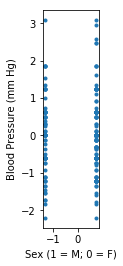

In [81]:
plt.figure(figsize=(1,4))
plt.plot(df_train[:, 0], df_train[:, 2], '.')
plt.xlabel('Sex (1 = M; 0 = F)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.show()

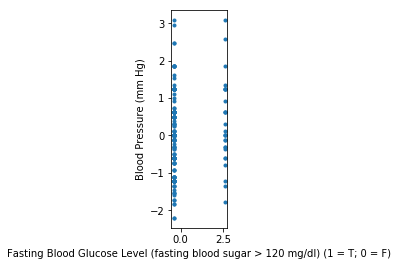

In [82]:
plt.figure(figsize=(1,4))
plt.plot(df_train[:, 4], df_train[:, 2], '.')
plt.xlabel('Fasting Blood Glucose Level (fasting blood sugar > 120 mg/dl) (1 = T; 0 = F)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.show()

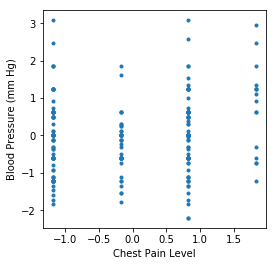

In [83]:
plt.figure(figsize=(4,4))
plt.plot(df_train[:, 1], df_train[:, 2], '.')
plt.xlabel('Chest Pain Level')
plt.ylabel('Blood Pressure (mm Hg)')
plt.show()

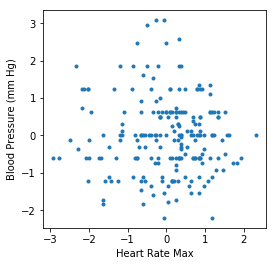

In [84]:
plt.figure(figsize=(4,4))
plt.plot(df_train[:, 6], df_train[:, 2], '.')
plt.xlabel('Heart Rate Max')
plt.ylabel('Blood Pressure (mm Hg)')
plt.show()

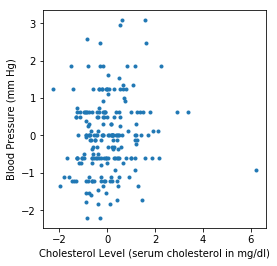

In [85]:
plt.figure(figsize=(4,4))
plt.plot(df_train[:, 3], df_train[:, 2], '.')
plt.xlabel('Cholesterol Level (serum cholesterol in mg/dl)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.show()

# **Split the data into Training data and Test data**

In order to get better accuracy with logistic regression, we have to choose features that will make a real impact on the desicion of the classifier; the target (whether the person has heart disease or not), so in this case I've chosen all the columns as input features. And also extracted the last column as the output vector for the dataset.
​
Then I had to split the dataset into training (228) and test sets, with test set size (76) equal to 25% of the total dataset size.

In [0]:
x_train = df_train[:, 0:12]
y_train = df_train[:, 12]
x_test = df_test[:, 0:12]
y_test = df_test[:, 12]

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 12)
(91, 12)
(212,)
(91,)


In [0]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

# **Analyze features, identify patterns, and explore the data**





In [89]:

# column names in accordance with feature information
col_names = ['age','sex','chest_pain','bp (mm Hg)','serum_cholesterol','fbs', 'ecg',
             'hr','exang','old_peak','slope','ca','thal','target']
# age = age in years
# sex = (1 = male; 0 = female)
# chest_pain = chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
# bp = blood pressure (mm Hg)
# chol = serum cholesterol (mg/dL)
# fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# ecg = electrocardiogram (0 = normal; 1 = having ST-T; 2 = hypertrophy)
# hr = max heart rate
# exang = exercise induced angina (1 = yes; 0 = no)
# old_peak = ST depression induced by exercise relative to rest
# slope = the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
# ca = number of major vessels (0-3) colored by flourosopy
# thal = 3 = normal; 6 = fixed defect; 7 = reversable defect
# target = predicted attribute - diagnosis of heart disease  (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

# read csv file, skip first row of descriptors
df = pd.read_csv("heart.csv", names=col_names, skiprows=1, header=None, na_values="?")
print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

# display the first 5 lines
df.head()


Number of records: 303
Number of variables: 14


,age,sex,chest_pain,bp (mm Hg),serum_cholesterol,fbs,ecg,hr,exang,old_peak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                  303 non-null int64
sex                  303 non-null int64
chest_pain           303 non-null int64
bp (mm Hg)           303 non-null int64
serum_cholesterol    303 non-null int64
fbs                  303 non-null int64
ecg                  303 non-null int64
hr                   303 non-null int64
exang                303 non-null int64
old_peak             303 non-null float64
slope                303 non-null int64
ca                   303 non-null int64
thal                 303 non-null int64
target               303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [91]:
# extract numeric columns and find categorical ones
numeric_columns = ['serum_cholesterol', 'hr', 'age', 'bp (mm Hg)', 'slope']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['sex', 'chest_pain', 'fbs', 'ecg', 'exang', 'old_peak', 'ca', 'thal', 'target']


In [92]:

# count values of 'unique variable' found amongst dataset
# 138 value occurs most in patients WITHOUT heart disease
# 165 value occurs most in patients WITH hert disease
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

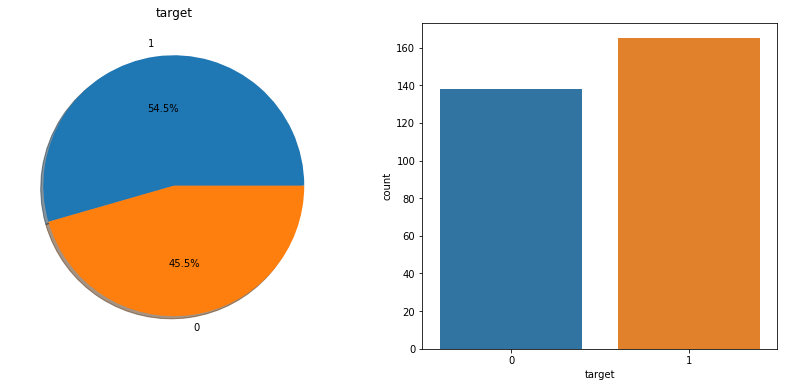

In [93]:
# create two plots side by side
# 54.5% of our dataset has heart disease
# 45.5% of our dataset does not have heart disease
# 165 individuals in dataset has heart disease
# 138 individuals in dataset does not have heart disease
f, ax = plt.subplots(1,2,figsize=(14,6))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target', data=df, ax=ax[1])
plt.show()

In [94]:
# create a boolean vector and map it with corresponding values (True=1, False=0)
df.target = (df.target != 0).astype(int)
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# **Statistics**

In [95]:
# descriptive statistics at a glance
df[numeric_columns].describe()

,serum_cholesterol,hr,age,bp (mm Hg),slope
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.264026,149.646865,54.366337,131.623762,1.399340
std,51.830751,22.905161,9.082101,17.538143,0.616226
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,47.500000,120.000000,1.000000
50%,240.000000,153.000000,55.000000,130.000000,1.000000
75%,274.500000,166.000000,61.000000,140.000000,2.000000
max,564.000000,202.000000,77.000000,200.000000,2.000000


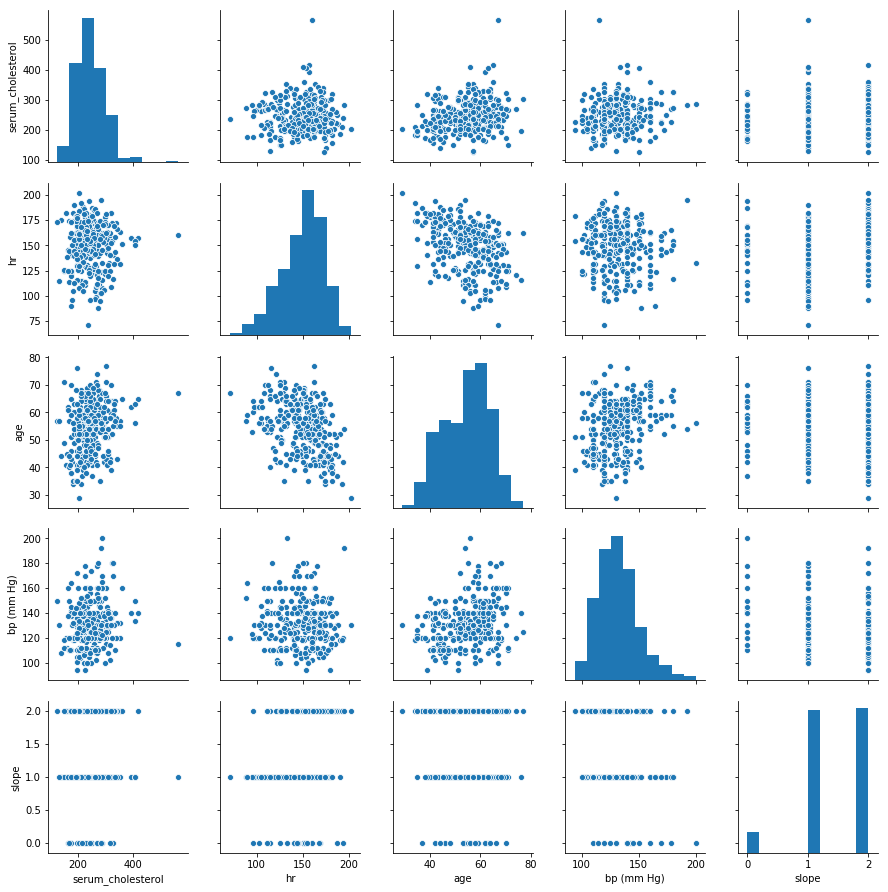

In [96]:

# create a pairplot to visualize relationship between numeric features via pairplot method
sns.pairplot(df[numeric_columns])
plt.show()

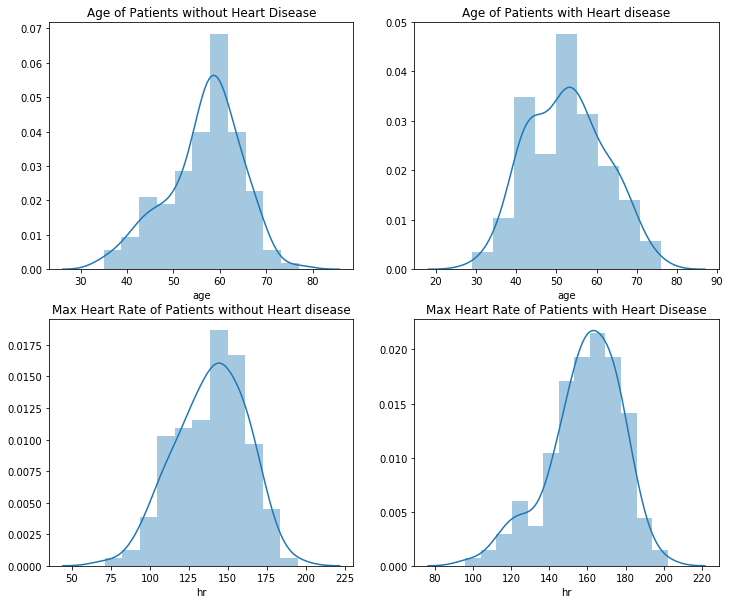

In [97]:

# create four distplots
# distplots allow both the histogram and densities in the same plot, 
# courtesy of the seaborn package 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of Patients without Heart Disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of Patients with Heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].hr)
plt.title('Max Heart Rate of Patients without Heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].hr)
plt.title('Max Heart Rate of Patients with Heart Disease')
plt.show()

In [98]:
# count no heart disease vs heart disease people grouped by sex
# reminder: target 0 and 1 is no heart disease and heart disease, repectfully
df.groupby(['sex','target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

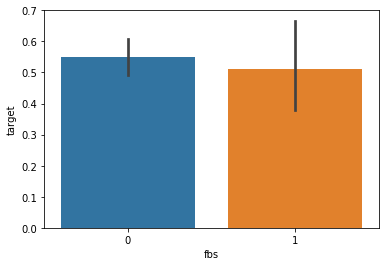

In [99]:
# create a barplot
sns.barplot(x="fbs", y="target", data=df)

In [100]:
# extract the target variable
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [101]:

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [102]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Modeling and Predicting with Neural Learning





In [0]:

def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

## **Create a neural network model with 12 neurons in layer 1, 8 neurons in layer 2, and 1 neuron as the last layer**

In [104]:
model = Sequential()
model.add(Dense(12, input_dim=12, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________
None


## **Check for proper neural connections by compiling the model**

In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse']) # mse = mean squared error

In [0]:
#model.compile(loss='mse', optimizer='sgd', metrics=['mae'])

## **Performing the Training (i.e. Fitting the Model)**

- feed x-train into model & model calculators errors using y-train
- In one epoch the model scans through the entire rows in the x-train
- Updating the number of epochs usually increases the accuracy of the model
- To observe the accuracy on the validation data during the training, add ", validation_data = (x-test, y-test)""

Note: adapted from https://github.com/badriadhikari/2019-Spring-DL/blob/master/course_content/module1_intro2ML/06_NNs_for_Regression.ipynb

In [107]:
history = model.fit(x_train, y_train, epochs=256, batch_size=32)


Epoch 1/256
212/212 [==============================] - 0s 1ms/step - loss: 0.2621 - mean_squared_error: 0.2621
Epoch 2/256
212/212 [==============================] - 0s 51us/step - loss: 0.2556 - mean_squared_error: 0.2556
Epoch 3/256
212/212 [==============================] - 0s 55us/step - loss: 0.2538 - mean_squared_error: 0.2538
Epoch 4/256
212/212 [==============================] - 0s 57us/step - loss: 0.2531 - mean_squared_error: 0.2531
Epoch 5/256
212/212 [==============================] - 0s 54us/step - loss: 0.2525 - mean_squared_error: 0.2525
Epoch 6/256
212/212 [==============================] - 0s 64us/step - loss: 0.2517 - mean_squared_error: 0.2517
Epoch 7/256
212/212 [==============================] - 0s 62us/step - loss: 0.2509 - mean_squared_error: 0.2509
Epoch 8/256
212/212 [==============================] - 0s 55us/step - loss: 0.2505 - mean_squared_error: 0.2505
Epoch 9/256
212/212 [==============================] - 0s 58us/step - loss: 0.2499 - mean_squared_error: 

## Evaluation of Training data Model

Testing of training model

In [108]:
scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f" % (model.metrics_names[1], scores[1]))

212/212 [==============================] - 0s 379us/step
['loss', 'mean_squared_error']
[0.21943845810755244, 0.21943845810755244]

mean_squared_error: 0.22


In [109]:
# mean absolute error
results = model.evaluate(x_test, y_test)
print ('mae = ', results[1])

91/91 [==============================] - 0s 41us/step
mae =  0.26630978695638885


In [0]:
prediction = model.predict(x_test)

In [111]:
print(y_test[0:5])

55     1
26     1
217    0
84     1
64     1
Name: target, dtype: int64


In [112]:
print(prediction[0:5])

[[0.744116  ]
 [0.62556654]
 [0.52625805]
 [0.52706057]
 [0.72160167]]


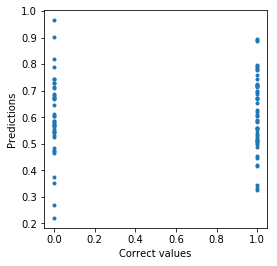

In [113]:
plt.figure(figsize=(4,4))
plt.plot(y_test, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

**Logistic Regression** - attempt to predict a data value based on prior observations. A logistic regression algorithm looks at the relationship between a dependent variable and one or more dependent variables

In [114]:
# logistic regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 84.43%
Test accuracy: 91.21%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Predict if an individual, given various personal characteristics and symptoms, will get heart disease or not

## Analysis

In [115]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['Logistic Regression']

# list of algorithms with parameters
models = [LogisticRegression()]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
    
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,accuracy
Logistic Regression,0.912088


### All in all, neural learning has a bright future in the healthcare field, specifically in heart disease (the number one disease as previously mentioned).  Imagine living in a world where heart disease experts are not available. Conversely bright individuals with with coding and neural networking experience will be able to predict whether a disease will occur or not accurately. This may be achieved with  information about a certain patient's medical history. 